In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data Preparation
PATH = '/content/drive/MyDrive/data/flower_photos/'
BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                              PATH,
                                              validation_split=0.2,
                                              subset="training",
                                              seed=123,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                                  PATH,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

train_dataset = train_dataset.cache().prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=BUFFER_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Epoch 1/250
23/23 [==============================] - 912s 27s/step - loss: 2.0147 - accuracy: 0.2162 - val_loss: 1.6128 - val_accuracy: 0.1757
Epoch 2/250
23/23 [==============================] - 10s 456ms/step - loss: 1.6104 - accuracy: 0.3315 - val_loss: 1.6124 - val_accuracy: 0.1757
Epoch 3/250
23/23 [==============================] - 11s 460ms/step - loss: 1.5090 - accuracy: 0.3698 - val_loss: 1.6125 - val_accuracy: 0.2398
Epoch 4/250
23/23 [==============================] - 11s 462ms/step - loss: 1.4386 - accuracy: 0.4200 - val_loss: 1.6155 - val_accuracy: 0.2398
Epoch 5/250
23/23 [==============================] - 11s 465ms/step - loss: 1.3654 - accuracy: 0.4558 - val_loss: 1.6201 - val_accuracy: 0.2398
Epoch 6/250
23/23 [==============================] - 11s 467ms/step - loss: 1.3310 - accuracy: 0.4691 - val_loss: 1.6321 - val_accuracy: 0.2398
Epoch 7/250
23/23 [==============================] - 11s 468ms/step - loss: 1.2949 - accuracy: 0.4704 - val_loss: 1.6484 - val_accuracy: 

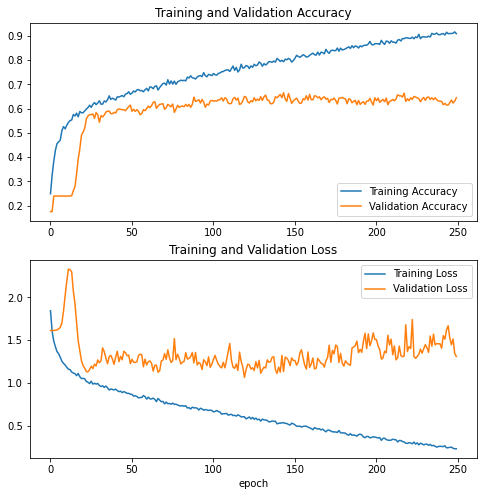

In [ ]:
### from scratch

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False, weights=None)
# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=0.00001), 
              metrics=['accuracy'])
history_fine = model.fit(train_dataset, epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/250
23/23 [==============================] - 8s 207ms/step - loss: 2.9120 - accuracy: 0.1943 - val_loss: 1.9074 - val_accuracy: 0.3542
Epoch 2/250
23/23 [==============================] - 4s 159ms/step - loss: 2.2238 - accuracy: 0.2850 - val_loss: 1.6128 - val_accuracy: 0.4523
Epoch 3/250
23/23 [==============================] - 4s 159ms/step - loss: 1.8977 - accuracy: 0.3779 - val_loss: 1.4225 - val_accuracy: 0.5300
Epoch 4/250
23/23 [==============================] - 4s 159ms/step - loss: 1.6889 - accuracy: 0.4293 - val_loss: 1.2980 - val_accuracy: 0.5708
Epoch 5/250
23/23 [==============================] - 4s 159ms/step - loss: 1.5802 - accuracy: 0.4644 - val_loss: 1.2012 - val_accuracy: 0.5967
Epoch 6/250
23/23 [==============================] - 4s 160ms/step - loss: 1.4481 - accuracy: 0.5159 - val_loss: 1.1362 - val_accuracy: 0.6117
Epoch 7/250
23/23 [==============================] - 4s 159ms/step - loss: 1.

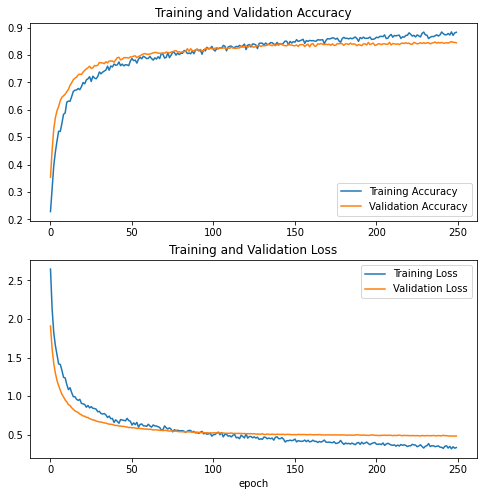

In [ ]:
# transfer learning

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

# freeze the base model
base_model.trainable = False

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

96
Epoch 1/250
23/23 [==============================] - 12s 318ms/step - loss: 1.8693 - accuracy: 0.2202 - val_loss: 1.7507 - val_accuracy: 0.3556
Epoch 2/250
23/23 [==============================] - 6s 270ms/step - loss: 1.4552 - accuracy: 0.3964 - val_loss: 1.2509 - val_accuracy: 0.5300
Epoch 3/250
23/23 [==============================] - 6s 272ms/step - loss: 1.2072 - accuracy: 0.5391 - val_loss: 0.9992 - val_accuracy: 0.6349
Epoch 4/250
23/23 [==============================] - 6s 274ms/step - loss: 1.0350 - accuracy: 0.6038 - val_loss: 0.8494 - val_accuracy: 0.6826
Epoch 5/250
23/23 [==============================] - 6s 276ms/step - loss: 0.9067 - accuracy: 0.6670 - val_loss: 0.7744 - val_accuracy: 0.7139
Epoch 6/250
23/23 [==============================] - 6s 274ms/step - loss: 0.8443 - accuracy: 0.7047 - val_loss: 0.7112 - val_accuracy: 0.7330
Epoch 7/250
23/23 [==============================] - 6s 272ms/step - loss: 0.7537 - accuracy: 0.7345 - val_loss: 0.6655 - val_accuracy: 0.

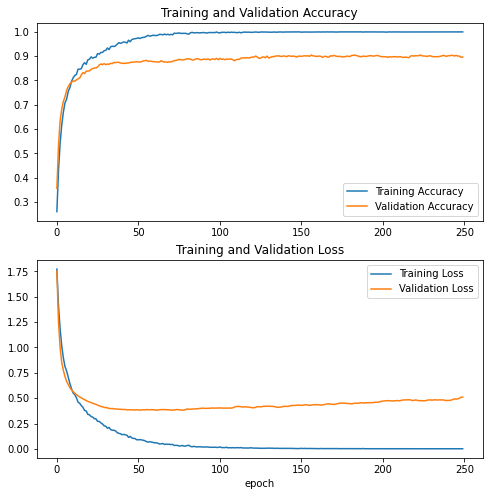

In [ ]:
# fine tuning

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze some first the layers
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

print(len(base_model.trainable_variables))

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/250
23/23 [==============================] - 18s 535ms/step - loss: 1.7873 - accuracy: 0.2624 - val_loss: 1.7166 - val_accuracy: 0.4278
Epoch 2/250
23/23 [==============================] - 11s 490ms/step - loss: 1.4182 - accuracy: 0.4191 - val_loss: 1.3455 - val_accuracy: 0.5232
Epoch 3/250
23/23 [==============================] - 11s 497ms/step - loss: 1.1731 - accuracy: 0.5455 - val_loss: 1.0424 - val_accuracy: 0.6444
Epoch 4/250
23/23 [==============================] - 11s 497ms/step - loss: 1.0310 - accuracy: 0.6081 - val_loss: 0.8926 - val_accuracy: 0.6771
Epoch 5/250
23/23 [==============================] - 11s 492ms/step - loss: 0.8812 - accuracy: 0.6760 - val_loss: 0.7380 - val_accuracy: 0.7425
Epoch 6/250
23/23 [==============================] - 11s 489ms/step - loss: 0.8393 - accuracy: 0.6940 - val_loss: 0.6636 - val_accuracy: 0.7616
Epoch 7/250
23/23 [==============================] - 11s 489ms/step - loss: 0.7482 - accuracy: 0.7334 - val_loss: 0.6231 - val_accuracy:

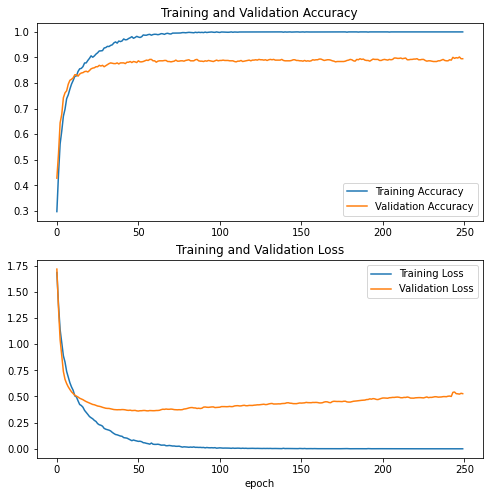

In [ ]:
# flatten

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/250
23/23 [==============================] - 18s 534ms/step - loss: 1.8338 - accuracy: 0.2424 - val_loss: 1.7748 - val_accuracy: 0.3515
Epoch 2/250
23/23 [==============================] - 11s 492ms/step - loss: 1.4107 - accuracy: 0.4135 - val_loss: 1.2844 - val_accuracy: 0.5095
Epoch 3/250
23/23 [==============================] - 11s 499ms/step - loss: 1.1918 - accuracy: 0.5243 - val_loss: 1.0387 - val_accuracy: 0.6267
Epoch 4/250
23/23 [==============================] - 11s 498ms/step - loss: 1.0281 - accuracy: 0.6168 - val_loss: 0.8849 - val_accuracy: 0.6948
Epoch 5/250
23/23 [==============================] - 11s 491ms/step - loss: 0.9471 - accuracy: 0.6508 - val_loss: 0.7717 - val_accuracy: 0.7262
Epoch 6/250
23/23 [==============================] - 11s 487ms/step - loss: 0.8135 - accuracy: 0.7070 - val_loss: 0.7013 - val_accuracy: 0.7452
Epoch 7/250
23/23 [==============================] - 11s 486ms/step - loss: 0.7284 - accuracy: 0.7469 - val_loss: 0.6489 - val_accuracy:

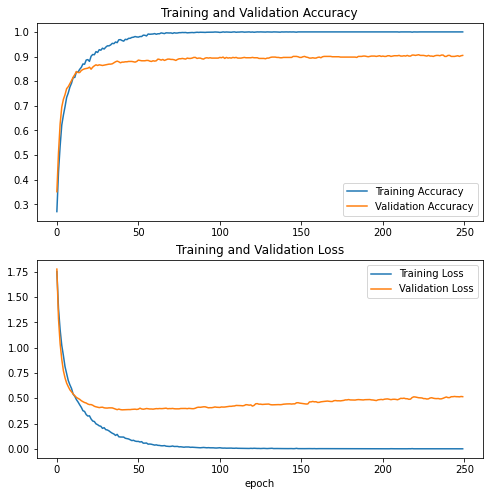

In [ ]:
# gmp

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_max = tf.keras.layers.GlobalMaxPool2D()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/250
23/23 [==============================] - 18s 538ms/step - loss: 1.8464 - accuracy: 0.2148 - val_loss: 1.9001 - val_accuracy: 0.3692
Epoch 2/250
23/23 [==============================] - 11s 493ms/step - loss: 1.4793 - accuracy: 0.3882 - val_loss: 1.2794 - val_accuracy: 0.5381
Epoch 3/250
23/23 [==============================] - 11s 498ms/step - loss: 1.2238 - accuracy: 0.5097 - val_loss: 1.0374 - val_accuracy: 0.6322
Epoch 4/250
23/23 [==============================] - 11s 493ms/step - loss: 1.0611 - accuracy: 0.6025 - val_loss: 0.8831 - val_accuracy: 0.6744
Epoch 5/250
23/23 [==============================] - 11s 489ms/step - loss: 0.9214 - accuracy: 0.6586 - val_loss: 0.7891 - val_accuracy: 0.7057
Epoch 6/250
23/23 [==============================] - 11s 488ms/step - loss: 0.8134 - accuracy: 0.7189 - val_loss: 0.7220 - val_accuracy: 0.7316
Epoch 7/250
23/23 [==============================] - 11s 488ms/step - loss: 0.7598 - accuracy: 0.7164 - val_loss: 0.6721 - val_accuracy:

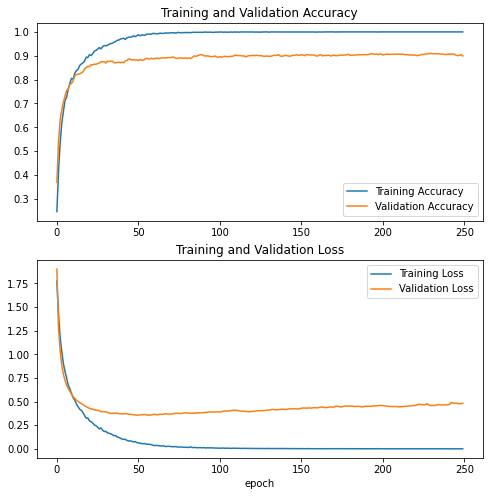

In [ ]:
# gap

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_average = tf.keras.layers.GlobalAveragePooling2D()

# drop out
drop = tf.keras.layers.Dropout(0.2)

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

# graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()